<a href="https://colab.research.google.com/github/AldoMercado/Clasificacion-inteligente-de-datos/blob/main/Hands-on-4/Hands_on_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on 4: Tutorial de Árboles de Decisión**
* **Nombre:** Aldo Giovanni Mercado Rodriguez
* **Materia:** Clasificación Inteligente de Datos

## **1.1 Fundamentos de la técnica**

Un **Árbol de Decisión** es un modelo de aprendizaje supervisado que se puede usar tanto para clasificación como para regresión. Su lógica es muy similar a la forma en que los humanos tomamos decisiones: basándonos en una serie de reglas "Si-Entonces" (If-Else).


**Estructura:**
* **Nodo Raíz (Root):** Es el punto de partida del árbol, donde se hace la primera división de los datos.
* **Nodos Internos:** Son puntos de decisión donde se evalúa una característica (ej. "¿Largo del pétalo < 2.45 cm?").
* **Hojas (Leaves):** Son los nodos finales que ya no se dividen. Aquí es donde se asigna la etiqueta de la clase final.
* **Funcionamiento:** El algoritmo busca la mejor característica y el mejor punto de corte (umbral) para dividir los datos en dos grupos, de manera que los grupos resultantes sean lo más "puros" posible (que contengan mayoritariamente una sola clase).
* **Ventaja Principal:** Son modelos de **"Caja Blanca"**. Son fáciles de interpretar y visualizar. No requieren escalado de datos.

## 1.2 Modelo Matemático

El árbol decide cómo dividir los datos buscando minimizar la "impureza". Existen dos criterios matemáticos principales para medir esta impureza:

**1. Impureza Gini (Gini Impurity):**
Es el criterio por defecto en Scikit-Learn. Mide la probabilidad de clasificar incorrectamente un elemento aleatorio si se etiquetara aleatoriamente según la distribución de clases en el nodo.
La fórmula para un nodo con clases $C$ es:

$$Gini = 1 - \sum_{i=1}^{C} (p_i)^2$$

Donde $p_i$ es la probabilidad (frecuencia relativa) de la clase $i$ en ese nodo. Un Gini de 0 significa pureza total (todos los elementos son de la misma clase).

**2. Entropía (Entropy) / Ganancia de Información:**
Basada en la teoría de la información. Mide el desorden en el nodo.

$$Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)$$

El algoritmo calcula estas métricas para todas las posibles divisiones y elige la que resulta en la mayor **Ganancia de Información** (la mayor reducción de impureza o entropía).

## **1.3 Descripción de la librería**

* **sklearn.tree.DecisionTreeClassifier**: La clase principal para crear el modelo de clasificación basado en árboles.
* **sklearn.tree.plot_tree**: Una función vital para esta práctica. Nos permite **dibujar** el árbol gráficamente para ver las ramas y decisiones.
* **sklearn.tree.export_text**: Nos permite ver las reglas del árbol en formato de texto (como una lista de If-Else).
* **sklearn.model_selection.train_test_split**: Para dividir datos en entrenamiento y prueba.
* **Nota sobre Escalado:** A diferencia de kNN y Perceptrón, los Árboles de Decisión **NO requieren escalado de datos** (StandardScaler). Funcionan igual de bien con los datos originales, lo cual simplifica el pipeline.

## **1.4 Pipeline**

A continuación, el flujo de trabajo completo para entrenar, visualizar y evaluar un Árbol de Decisión.

In [1]:
# Paso 0: Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Importamos las herramientas específicas de Árboles
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

### + **Carga y División de Datos**

Usaremos el dataset Iris completo (3 clases). No aplicaremos StandardScaler porque los árboles son invariantes a la escala de los datos.

In [2]:
# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Dividir los datos (70% entrenamiento, 30% prueba)
# random_state=42 para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Datos cargados y divididos.")
print(f"Muestras de entrenamiento: {X_train.shape[0]}")
print(f"Muestras de prueba: {X_test.shape[0]}")

Datos cargados y divididos.
Muestras de entrenamiento: 105
Muestras de prueba: 45


### + **Model Training (Entrenamiento)**

Entrenaremos el árbol. Podemos configurar max_depth(profundidad máxima) para evitar que el árbol crezca demasiado y se vuelva muy complejo (overfitting). Para Iris, unmax_depth de 3 o 4 suele ser suficiente.

In [3]:
# 1. Crear el modelo
# max_depth=3: Limitamos el árbol a 3 niveles de profundidad para que sea fácil de leer
clf_tree = DecisionTreeClassifier(random_state=42, max_depth=3)

# 2. Entrenar el modelo
clf_tree.fit(X_train, y_train)

print("¡Modelo Árbol de Decisión entrenado!")

¡Modelo Árbol de Decisión entrenado!


### + **Visualización del Árbol (Requerimiento Clave)**

Las instrucciones piden visualizar la estructura del árbol de dos formas: Texto y Gráfico.

**1. Representación en Texto (Reglas If-Else):**

In [4]:
# Generar la representación de texto
r = export_text(clf_tree, feature_names=feature_names)

print("--- Reglas del Árbol (Formato Texto) ---")
print(r)

--- Reglas del Árbol (Formato Texto) ---
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2



**2. Representación Gráfica (Diagrama del Árbol):**

Aquí veremos los nodos, las condiciones de división (ej. petal length <= 2.45), el índice Gini y la clase dominante en cada nodo.

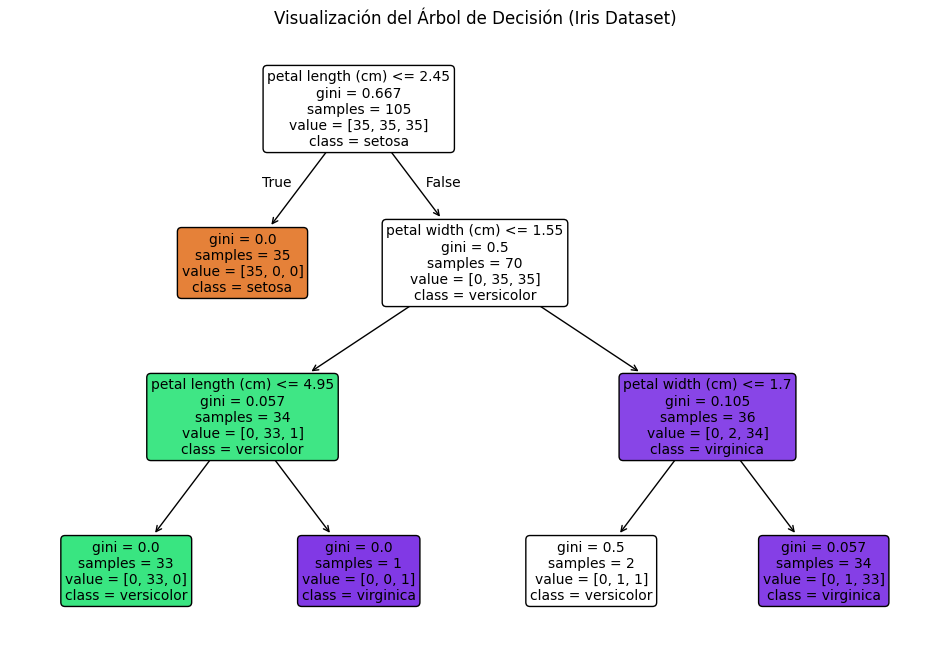

In [5]:
plt.figure(figsize=(12, 8)) # Ajustar el tamaño para que se vea bien

plot_tree(clf_tree,
          feature_names=feature_names,
          class_names=target_names,
          filled=True, # Colorea los nodos según la clase
          rounded=True, # Bordes redondeados
          fontsize=10)

plt.title("Visualización del Árbol de Decisión (Iris Dataset)")
plt.show()

### + **Prediction (Predicción)**

Creamos la función para predecir la clase de un nuevo patrón individual.

In [6]:
# Función para probar un patrón de entrada individual
def probar_patron_arbol(patron):
    if len(patron) != 4:
        print("Error: El patrón debe tener 4 características.")
        return

    # Nota: No necesitamos escalar el patrón aquí
    # [patron] lo convierte en array 2D
    prediccion = clf_tree.predict([patron])
    clase_idx = prediccion[0]
    clase_nombre = target_names[clase_idx]

    print(f"Patrón de entrada: {patron}")
    print(f"Clase predicha: {clase_idx} ({clase_nombre})")


# --- Pruebas ---
print("--- Prueba 1 (Setosa) ---")
probar_patron_arbol([5.1, 3.5, 1.4, 0.2])

print("\n--- Prueba 2 (Virginica) ---")
probar_patron_arbol([6.5, 3.0, 5.2, 2.0])

--- Prueba 1 (Setosa) ---
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Clase predicha: 0 (setosa)

--- Prueba 2 (Virginica) ---
Patrón de entrada: [6.5, 3.0, 5.2, 2.0]
Clase predicha: 2 (virginica)


### + **Model Evaluation (Evaluación)**

Evaluamos el desempeño usando Accuracy y la Matriz de Confusión.

Accuracy del Árbol: 97.78%


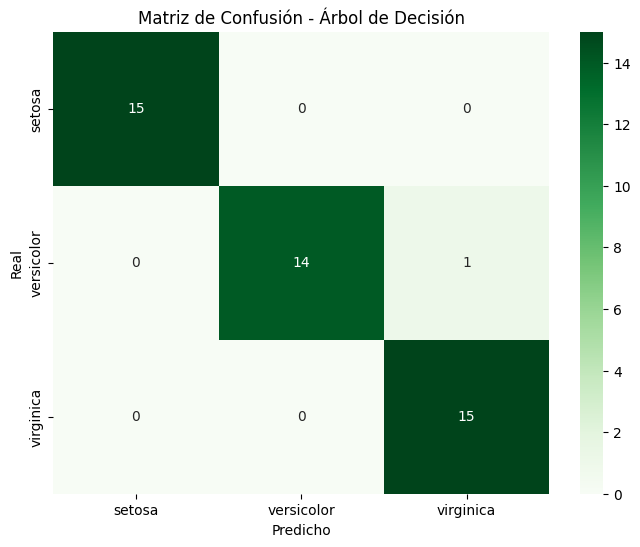

In [7]:
# 1. Predecir sobre el conjunto de prueba
y_pred = clf_tree.predict(X_test)

# 2. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del Árbol: {acc * 100:.2f}%")

# 3. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names,
            yticklabels=target_names)

plt.title("Matriz de Confusión - Árbol de Decisión")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

### + **Bonus: Límite de Decisión**

A diferencia del Perceptrón que dibuja una línea diagonal, el Árbol de Decisión dibuja **regiones rectangulares** (cortes ortogonales). Veamos esto gráficamente usando solo 2 variables (Largo y Ancho de Pétalo).

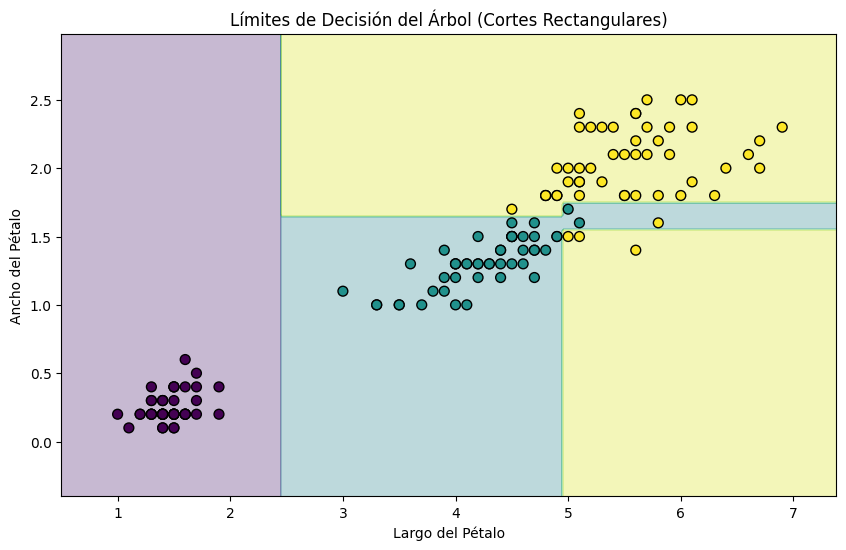

In [8]:
# Entrenamos un árbol simple solo con 2 variables para poder graficar en 2D
X_2d = X[:, [2, 3]] # Solo largo y ancho de pétalo
clf_2d = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_2d.fit(X_2d, y)

# Crear malla para graficar
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis') # Fondos de colores
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', s=50, cmap='viridis') # Puntos

plt.xlabel('Largo del Pétalo')
plt.ylabel('Ancho del Pétalo')
plt.title('Límites de Decisión del Árbol (Cortes Rectangulares)')
plt.show()

## **3. Referencias Bibliográficas**

* Scikit-Learn Developers. (2023). *Decision Trees*. Scikit-Learn User Guide. Recuperado de: https://scikit-learn.org/stable/modules/tree.html
* Scikit-Learn Developers. (2023). *Plot Tree Visualization*. Recuperado de: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
* Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems* (2nd ed.). O'Reilly Media. (Capítulo 6: Decision Trees).
* Breiman, L., Friedman, J., Stone, C. J., & Olshen, R. A. (1984). *Classification and Regression Trees* (CART). Taylor & Francis. (El algoritmo base que usa Scikit-Learn).
* Starmer, J. (StatQuest). *Decision Trees and the Gini Impurity*. (Recurso educativo visual sobre el cálculo de impureza).